# Random probabilities basics


## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

SEED = 666420
rng = np.random.default_rng(SEED)

# Numerical algorithms for probabilities

Let's say you have a probability distribution and you want to generate random number from it. 
Actually it is not that easy to generate random number. 

And computer generate pseudo random numbers


https://en.wikipedia.org/wiki/Pseudorandom_number_generator




## Using the code from the wikipedia article. Implement the following class RandomGenerator

In [2]:
class RandomGenerator:
    def __init__(self, seed: int):
        self.seed_lcg = seed
        self.seed_ms = seed
        self.modulus = 2**32
        self.multiplier = 1103515245
        self.increment = 12345

    def generate_number_middle_square(self) -> float:
        square = self.seed_ms ** 2
        square_str = str(square)
        len_str = len(square_str)
        start = (len_str - len(str(self.seed_ms))) // 2
        end = start + len(str(self.seed_ms))
        middle_digits = square_str[start:end]
        self.seed_ms = int(middle_digits)
        max_value = 10 ** len(str(self.seed_ms)) - 1
        return self.seed_ms / max_value

    def generate_number_lcg(self) -> float:
        self.seed_lcg = (self.multiplier * self.seed_lcg + self.increment) % self.modulus
        return self.seed_lcg / self.modulus

## Use your class to generate 1000 number and display an histogram of it with 50 bins

In [3]:
generator = RandomGenerator(SEED)

# Generate 1000 numbers
numbers_1 = [generator.generate_number_middle_square() for _ in range(1000)]
numbers_2 = [generator.generate_number_lcg() for _ in range(1000)]

### Middle square

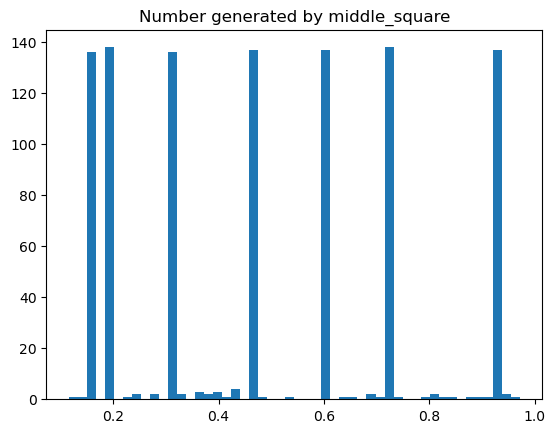

In [4]:
plt.hist(numbers_1, bins=50)
plt.title("Number generated by middle_square")
plt.show()

In [5]:
# From Wikipedia, https://en.wikipedia.org/wiki/Middle-square_method
number = SEED
already_seen = set()
counter = 0

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = int(str(number * number).zfill(8)[2:6])  # zfill adds padding of zeroes
    print(f"#{counter}: {number}")

print(f"We began with {SEED} and"
      f" have repeated ourselves after {counter} steps"
      f" with {number}.")

#1: 4115
#2: 9332
#3: 862
#4: 7430
#5: 2049
#6: 1984
#7: 9362
#8: 6470
#9: 8609
#10: 1148
#11: 3179
#12: 1060
#13: 1236
#14: 5276
#15: 8361
#16: 9063
#17: 1379
#18: 9016
#19: 2882
#20: 3059
#21: 3574
#22: 7734
#23: 8147
#24: 3736
#25: 9576
#26: 6997
#27: 9580
#28: 7764
#29: 2796
#30: 8176
#31: 8469
#32: 7239
#33: 4031
#34: 2489
#35: 1951
#36: 8064
#37: 280
#38: 784
#39: 6146
#40: 7733
#41: 7992
#42: 8720
#43: 384
#44: 1474
#45: 1726
#46: 9790
#47: 8441
#48: 2504
#49: 2700
#50: 2900
#51: 4100
#52: 8100
#53: 6100
#54: 2100
#55: 4100
We began with 666420 and have repeated ourselves after 55 steps with 4100.


### LCG

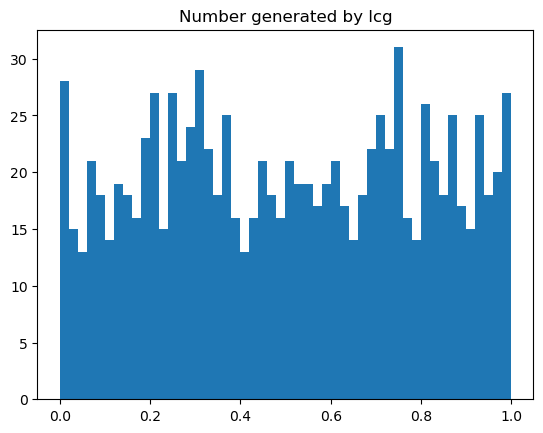

In [6]:
plt.hist(numbers_2, bins=50)
plt.title("Number generated by lcg")
plt.show()

## Generate 1000 number with numpy from a uniform distribution and display its histogram.

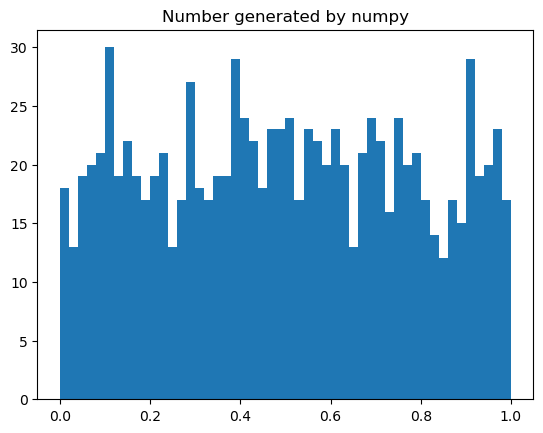

In [7]:
numbers = rng.uniform(0, 1, 1000)
plt.hist(numbers, bins=50)
plt.title("Number generated by numpy")
plt.show()

##  Are there notable differences ?

On voit que pour la méthode de 1946, middle_square, la génération de nombre tombe très très vite (55 itérations) dans une boucle qui répète les mêmes nombres en boucles.
C'est donc une méthode très peu efficace pour générer des nombres pseudos aléatoires.

La méthode linear congruential generator (LCG), de 1958, s'en tire déjà beaucoup mieux. Il est reconnu comme un des premiers algorithmes de génération pseudo-aléatoires qui soit simple et efficace.

Et la génération de Numpy est semblable, sur ce petit sample, à celle de LCG. Mais on suppose qu'elle est bien plus robuste et efficace pour un grand nombre de données.

## Sampling from distributions


We have so far generate number which are distributed uniformly. 

But what if we want to generate a function from a given distribution ? 

There are two kinds of methods : dependant sampling method and non dependant

##  Non dependent sampling methods



### Rejection sampling 

The simplest method : we sample a lot of values independantly from each other and we only keep the one we are happy about. 

Code a function sample_discrete_probability(p: float, n_values:int) -> np.array which return either 1 or 0 using sampling 

In [8]:
def sample_discrete_probability_choice(p: float, n_values: int) -> np.array:
    outcomes = np.array([0, 1])
    probabilities = np.array([1-p, p])

    samples = rng.choice(outcomes, size=n_values, p=probabilities)
    return samples

In [9]:
def sample_discrete_probability_rd(p: float, n_values: int) -> list:
    samples = [1 if rng.random() < p else 0 for _ in range(n_values)]

    return samples

Code a function rejection_sampling(pdf_function:callable, n_step) -> np.array wihch compute the rejection sampling given a pdf function provided as a parameter

In [10]:
def rejection_sampling_naive(pdf_function: callable, n_step: int) -> np.array:
    samples = []
    while len(samples) < n_step:
        x = rng.random() # Assuming the pdf is defined on [0, 1]
        y = rng.random()

        if y < pdf_function(x):
            samples.append(x)

    return np.array(samples)

In [11]:
def rejection_sampling_detailed(pdf_function: callable, n_samples: int, domain: tuple = (-10, 10), c: float = 1) -> np.array:
    samples = []
    while len(samples) < n_samples:
        x_proposal = rng.uniform(domain[0], domain[1])
        y = rng.uniform(0, 1)

        # if the random number is less than the ratio of the target to the proposal, accept the proposal
        if y < pdf_function(x_proposal) / (c * rng.uniform(domain[0], domain[1])):
            samples.append(x_proposal)

    return np.array(samples)

Code a function normal_pdf(x) which returns the pdf of x following a standardized gaussian law

In [12]:
def normal_pdf(x: float) -> float:
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

Test your rejection sampling function by generating 1000 values and display the histogram

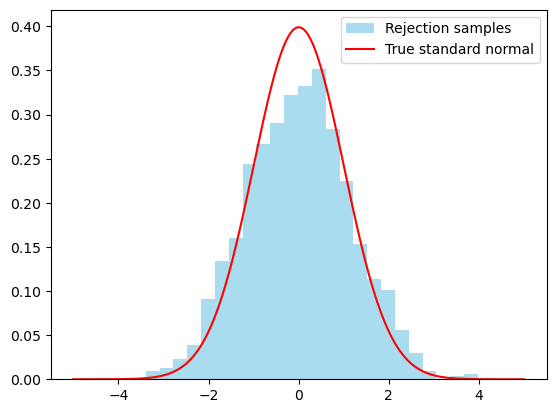

In [13]:
# Generate 1000 samples using the rejection sampling method
samples = rejection_sampling_detailed(normal_pdf, 1000, domain=(-5, 5))
plt.hist(samples, bins='auto', density=True, color='skyblue', alpha=0.7, label='Rejection samples')

# Plot the true standard normal distribution
x = np.linspace(-5, 5, 1000)
y = normal_pdf(x)
plt.plot(x, y, 'r', label='True standard normal')

plt.legend()
plt.show()

Compare it to the histogram generated by 1000 values using the randn function

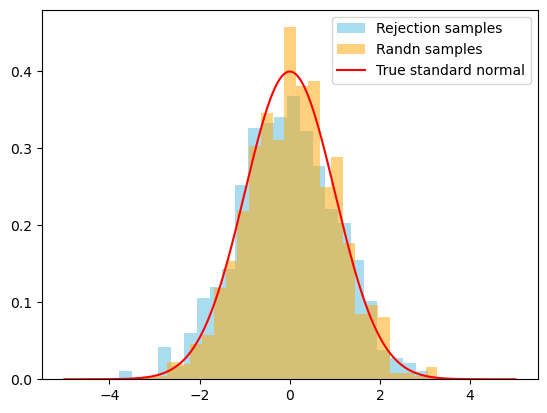

In [14]:
samples_rejection = rejection_sampling_detailed(normal_pdf, 1000, domain=(-5, 5))
samples_randn = rng.standard_normal(1000)

plt.hist(samples_rejection, bins='auto', density=True, color='skyblue', alpha=0.7, label='Rejection samples')
plt.hist(samples_randn, bins='auto', density=True, color='orange', alpha=0.5, label='Randn samples')

# Plot the true standard normal distribution
x = np.linspace(-5, 5, 1000)
y = normal_pdf(x)
plt.plot(x, y, 'r', label='True standard normal')

plt.legend()
plt.show()

On voit que la différence entre les deux histogrammes est négligeable devant le nombre de données générées.

On peut donc dire que la méthode de rejection sampling est efficace pour générer des données suivant une loi normale.